In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q tensorflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
## 모델과 토크나이져 가져옴
## 그러나 거대모델이기때문에 Gpt2의 예측헤드 모델만 사용하여 예측하고 텍스트 생성
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


## 아래는 PIpline을 이용해서 모델 로딩

In [10]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=50, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are the ones I like the most. To do your research, please contact me, this isn't your"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n\nBut my job as a C programmer is to sort through every single line of the script so I"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend from college a bit earlier, and in the context of the current language model I think it's important"},
 {'generated_text': 'Hello, I\'m a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string-replace "\\r" ))) {\n\nconsole. log\n\n}\n\nthat\'s'},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let'

In [3]:
tokenizer.eos_token_id

50256

# 2가지 접근 방식
## vim vs greedy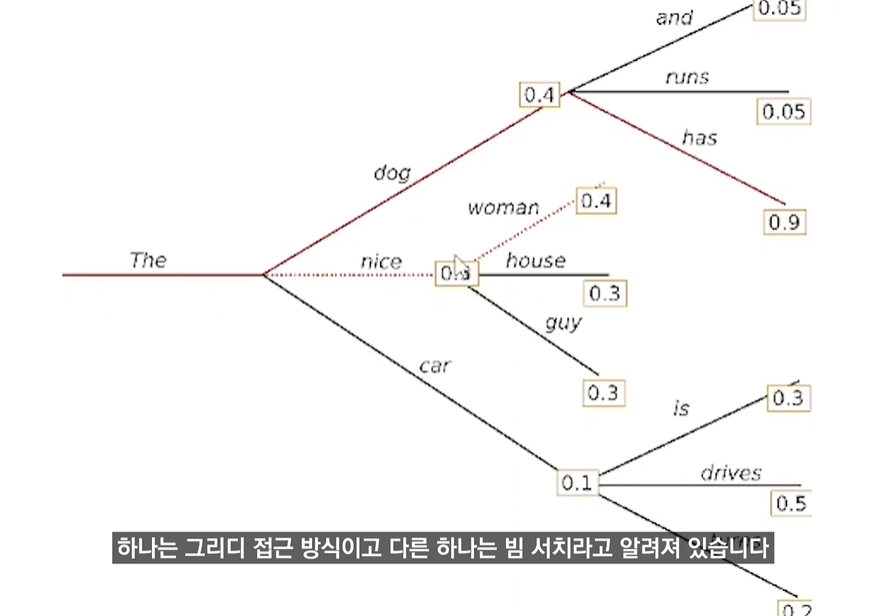

## Greedy
### 가장 높은 확률을 가지는 것을 선택

## VIm
### 가능성이 높은 빔의 수를 유지함으로써 숨겨진 높은 확률의 단어 시퀀스를 놓칠 위험을 줄인다.

In [9]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('My name is Hasnain and I am a software engineer.', return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)
input_ids

<tf.Tensor: shape=(1, 13), dtype=int32, numpy=
array([[ 3666,  1438,   318,  7875,    77,   391,   290,   314,   716,
          257,  3788, 11949,    13]], dtype=int32)>

# Output을 보면 그리디 방식을 사용하기 때문에 같은 답을 계속해서 반복함

In [5]:
print("Output:\n")
print(tokenizer.decode(greedy_output[0]))

Output:

My name is Hasnain and I am a software engineer. I am a member of the Open Source Software Foundation. I am a member of the Open Source Software Foundation. I am a member of the Open Source Software Foundation. I am a member


In [6]:
# set no_repeat_ngram_size to 2
beam_output = model.generate(
    input_ids,
    max_length=50,
    num_beams=5,
    no_repeat_ngram_size=2,
    early_stopping=True
)

## Greedy 방식과 비교했을때 나은 결과를 제공

In [7]:
print("Output:\n")
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:

My name is Hasnain and I am a software engineer. I have been working in the IT industry for over 20 years.

I have a passion for software development and have worked on many projects over the past few years, including:

